# Marking all Data

In [17]:
from decode import decode_A50, decode_A50_downhill, decode_F6P, decode_tile
import matplotlib.pyplot as plt
from sync import syncTile, splitTileIntoDownhillTracks
from tile import Tile
from track import Track

# No tile data was captured
# a50_2022_12_24 = decode_A50_downhill("../DATA/2022_12_24/Mt Morin Heights/A50/Morning ski at Morin Heights.csv")
# a50_all_2022_12_24 = decode_A50("../DATA/2022_12_24/Mt Morin Heights/A50/Morning ski at Morin Heights.csv")
# f6p_2022_12_24 = decode_F6P("../DATA/2022_12_24/Mt Morin Heights/F35/10181474438_ACTIVITY.csv")
# tile_2022_12_24 = decode_tile("../DATA/2022_12_24/Mt Morin Heights/Tile/SENS000.CSV")

a50_2022_12_26 = decode_A50_downhill("../DATA/2022_12_26/Mt Olympia/A50/Morning ski at Olympia.csv")
a50_all_2022_12_26 = decode_A50("../DATA/2022_12_26/Mt Olympia/A50/Morning ski at Olympia.csv")
f6p_2022_12_26 = decode_F6P("../DATA/2022_12_26/Mt Olympia/F35/10190939007_ACTIVITY.csv")
tile_2022_12_26 = decode_tile("../DATA/2022_12_26/Mt Olympia/Tile/SENS000.CSV")

a50_2022_12_27 = decode_A50_downhill("../DATA/2022_12_27/Mt Morin Heights/A50/Morning ski at Olympia.csv")
a50_all_2022_12_27 = decode_A50("../DATA/2022_12_27/Mt Morin Heights/A50/Morning ski at Olympia.csv")
f6p_2022_12_27 = decode_F6P("../DATA/2022_12_27/Mt Morin Heights/F35/10196117595_ACTIVITY.csv")
tile_2022_12_27 = decode_tile("../DATA/2022_12_27/Mt Morin Heights/Tile/SENS000.CSV")

a50_2023_12_30 = decode_A50_downhill("../DATA/2023_12_30/Mt Olympia/A50/Mount Olympia.csv")
a50_all_2023_12_30 = decode_A50("../DATA/2023_12_30/Mt Olympia/A50/Mount Olympia.csv")
f6p_2023_12_30 = decode_F6P("../DATA/2023_12_30/Mt Olympia/F6P/13293488821_ACTIVITY.csv")
tile_2023_12_30 = decode_tile("../DATA/2023_12_30/Mt Olympia/Tile/SENS000.CSV")

a50_2023_12_31 = decode_A50_downhill("../DATA/2023_12_31/Mt St Sauveur/A50/Mount St Sauveur PATCHED.csv")
a50_all_2023_12_31 = decode_A50("../DATA/2023_12_31/Mt St Sauveur/A50/Mount St Sauveur PATCHED.csv")
f6p_2023_12_31 = decode_F6P("../DATA/2023_12_31/Mt St Sauveur/F6P/13306856415_ACTIVITY.csv")
tile_2023_12_31 = decode_tile("../DATA/2023_12_31/Mt St Sauveur/Tile/SENS000.CSV")

a50_2024_01_01 = decode_A50_downhill("../DATA/2024_01_01/Mt Morin Heights/A50/Mount Morin Heights PATCHED.csv")
a50_all_2024_01_01 = decode_A50("../DATA/2024_01_01/Mt Morin Heights/A50/Mount Morin Heights PATCHED.csv")
f6p_2024_01_01 = decode_F6P("../DATA/2024_01_01/Mt Morin Heights/F6P/13319383173_ACTIVITY.csv")
tile_2024_01_01 = decode_tile("../DATA/2024_01_01/Mt Morin Heights/Tile/SENS000.CSV")

## Synchronize Tile Data with A50 Ground Truth

In [8]:
tile_2022_12_26_sync = syncTile(tile=tile_2022_12_26, truth=a50_all_2022_12_26, printOutput=True, use_mae=False, time_step_s=1, max_time_search_s=30, alt_step=0.25, min_alt_start=10, max_alt_search=50)
# tile_2022_12_27_sync = syncTile(tile=tile_2022_12_27, truth=a50_all_2022_12_27, time_step_s=0.5, max_time_search_s=180, alt_step=0.25, min_alt_start=10, max_alt_search=80)
# tile_2023_12_30_sync = syncTile(tile=tile_2023_12_30, truth=a50_all_2023_12_30, time_step_s=0.5, max_time_search_s=180, alt_step=0.25, min_alt_start=10, max_alt_search=80)
# tile_2023_12_31_sync = syncTile(tile=tile_2023_12_31, truth=a50_all_2023_12_31, time_step_s=0.5, max_time_search_s=180, alt_step=0.25, min_alt_start=10, max_alt_search=80)
tile_2024_01_01_sync = syncTile(tile=tile_2024_01_01, truth=a50_all_2024_01_01, printOutput=True, use_mae=False, time_step_s=1, max_time_search_s=30, alt_step=0.25, min_alt_start=10, max_alt_search=50)

Timestamp offset: 14000
Altitude offset: 57.0
Timestamp offset: 0
Altitude offset: 12.75


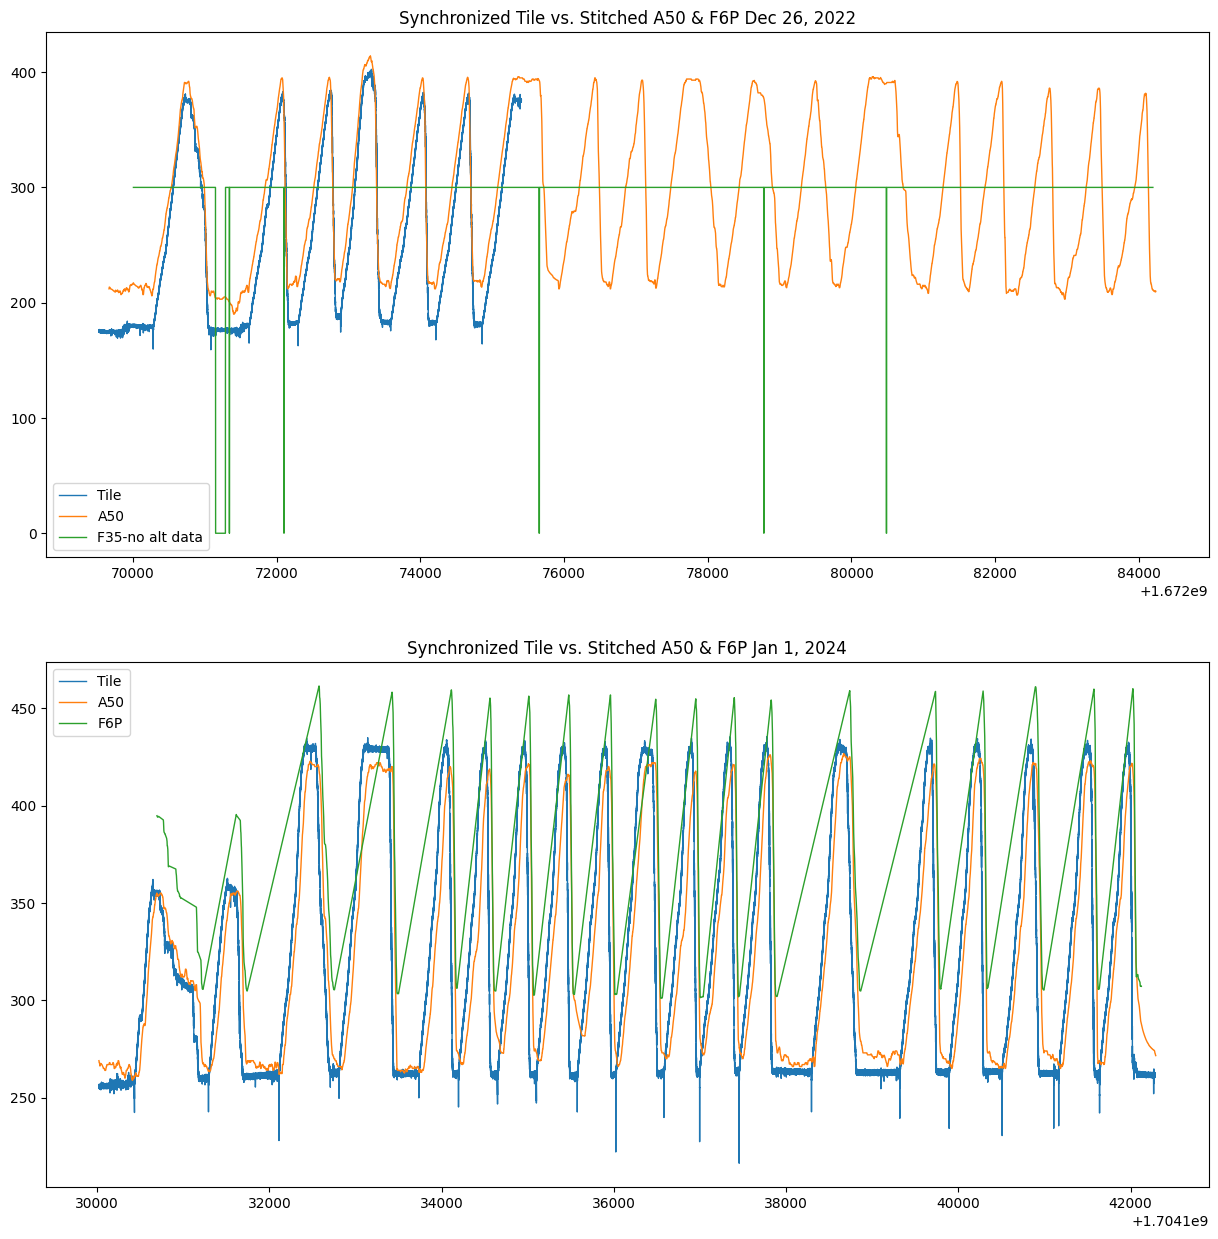

In [21]:
stitched_a50_all_2022_12_26_time = []
stitched_a50_all_2022_12_26_alt = []
stitched_f6p_all_2022_12_26_time = []
stitched_f6p_all_2022_12_26_alt = []

stitched_a50_all_2024_01_01_time = []
stitched_a50_all_2024_01_01_alt = []
stitched_f6p_all_2024_01_01_time = []
stitched_f6p_all_2024_01_01_alt = []

for track in a50_all_2022_12_26:
    stitched_a50_all_2022_12_26_time += track.time
    stitched_a50_all_2022_12_26_alt += track.alt
for track in f6p_2022_12_26:
    stitched_f6p_all_2022_12_26_time += track.time
    stitched_f6p_all_2022_12_26_alt += track.alt

for track in a50_all_2024_01_01:
    stitched_a50_all_2024_01_01_time += track.time
    stitched_a50_all_2024_01_01_alt += track.alt
for track in f6p_2024_01_01:
    stitched_f6p_all_2024_01_01_time += track.time
    stitched_f6p_all_2024_01_01_alt += track.alt


plt.rc('lines', linewidth=1)
fig, ax = plt.subplots(2, figsize=(15, 15))
ax[0].plot(tile_2022_12_26_sync.time, tile_2022_12_26_sync.alt, label='Tile')
ax[0].plot(stitched_a50_all_2022_12_26_time, stitched_a50_all_2022_12_26_alt, label='A50')
ax[0].plot(stitched_f6p_all_2022_12_26_time, stitched_f6p_all_2022_12_26_alt, label='F35-no alt data')
ax[0].set_title('Synchronized Tile vs. Stitched A50 & F6P Dec 26, 2022', wrap=True)
ax[0].legend()
ax[1].plot(tile_2024_01_01_sync.time, tile_2024_01_01_sync.alt, label='Tile')
ax[1].plot(stitched_a50_all_2024_01_01_time, stitched_a50_all_2024_01_01_alt, label='A50')
ax[1].plot(stitched_f6p_all_2024_01_01_time, stitched_f6p_all_2024_01_01_alt, label='F6P')
ax[1].set_title('Synchronized Tile vs. Stitched A50 & F6P Jan 1, 2024', wrap=True)
ax[1].legend()
plt.show()

## Split Tile into Downhill `[Tile]` with A50

In [6]:
# print(tile_2022_12_26_sync.time)
# tile_2022_12_26_runs = splitTileIntoDownhillTracks(tile_2022_12_26_sync, f6p_2022_12_26, a50_all_2022_12_26, printOutput=True, start_offset=False)
# tile_2022_12_27_runs = splitTileIntoDownhillTracks(tile_2022_12_27_sync, f6p_2022_12_27, a50_all_2022_12_27, printOutput=True, start_offset=False)
# tile_2023_12_30_runs = splitTileIntoDownhillTracks(tile_2023_12_30_sync, f6p_2023_12_30, a50_all_2023_12_30, printOutput=True, start_offset=False)
# tile_2023_12_31_runs = splitTileIntoDownhillTracks(tile_2023_12_31_sync, f6p_2023_12_31, a50_all_2023_12_31, printOutput=True, start_offset=False)
tile_2024_01_01_runs = splitTileIntoDownhillTracks(tile_2024_01_01_sync, f6p_2024_01_01)#, a50_all_2024_01_01, printOutput=True, start_offset=False)

[[1704130694, 1704131229], [1704131615, 1704131742], [1704132576, 1704132755], [1704133424, 1704133499], [1704134113, 1704134179], [1704134561, 1704134629], [1704135012, 1704135077], [1704135476, 1704135542], [1704135960, 1704136034], [1704136486, 1704136562], [1704136951, 1704137037], [1704137398, 1704137458], [1704137827, 1704137896], [1704138739, 1704138867], [1704139735, 1704139797], [1704140288, 1704140923], [1704140925, 1704140994], [1704141575, 1704141637], [1704142026, 1704142125]]
